# 7 딥러닝을 시작합니다

## 7-1 인공 신경망

### 패션 MNIST

In [ ]:
from tensorflow import keras
(train_input , train_target) , (test_input , test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print( train_input.shape , train_target.shape )

(60000, 28, 28) (60000,)


In [ ]:
print( test_input.shape , test_target.shape )

(10000, 28, 28) (10000,)


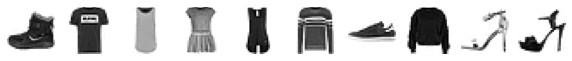

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10 , figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i] , cmap='gray_r' )
    axs[i].axis('off')
plt.show( )

In [ ]:
print( [ train_target[i] for i in range(10) ] )

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print( np.unique( train_target , return_counts = True ) )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


### 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1 , 28 * 28 )

In [ ]:
print( train_scaled.shape )

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier( loss = 'log' ,max_iter=5 , random_state=42 )
scores = cross_validate( sc , train_scaled , train_target , n_jobs=-1 )
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
iter_X = 20

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier( loss = 'log' ,max_iter=iter_X , random_state=42 )
scores = cross_validate( sc , train_scaled , train_target , n_jobs=-1 )
print(np.mean(scores['test_score']))

0.8436999999999999


### 인공 신경망

#### 텐서플로와 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

### 인공 신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target , val_target =  train_test_split(train_scaled, train_target ,test_size=0.2 , random_state=42 )

In [ ]:
print(train_scaled.shape , train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape , val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10 , activation='softmax' , input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

### 인공 신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , metrics='accuracy')

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled , train_target , epochs=5 )

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6046 - accuracy: 0.7960
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4786 - accuracy: 0.8384
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4561 - accuracy: 0.8465
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4445 - accuracy: 0.8522
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4358 - accuracy: 0.8554


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.4487 - accuracy: 0.8527


[0.4487331807613373, 0.8526666760444641]

## 7-2 심층 신경망

### 2개의 층

In [ ]:
from tensorflow import keras
(train_input , train_target) , (test_input , test_target) =\
keras.datasets.fashion_mnist.load_data( )

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape( -1 , 28 * 28 )
train_scaled, val_scaled, train_target, val_target = train_test_split( train_scaled , train_target , test_size=0.2 , random_state=42 )

In [ ]:
dense1 = keras.layers.Dense(100 , activation='sigmoid' , input_shape=(784,))
dense2 = keras.layers.Dense(10 , activation='softmax')

### 심층 신경망 만들기

In [ ]:
model = keras.Sequential([dense1 , dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층을 추가하는 다른 방법

In [ ]:
model = keras.Sequential([keras.layers.Dense(100 , activation = 'sigmoid' , input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax' , name='output' )
                          ], name='패션 MNIST 모델')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100 , activation='sigmoid' , input_shape=(784,)))
model.add(keras.layers.Dense(10 , activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy' , metrics='accuracy')
model.fit(train_scaled , train_target , epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5631 - accuracy: 0.8098
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4104 - accuracy: 0.8510
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3761 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3545 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3378 - accuracy: 0.8773


### 렐루 함수

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input , train_target) , (test_input , test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled , train_target , val_target = train_test_split(train_scaled, train_target , test_size = 0.2 , random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy' , metrics='accuracy')
model.fit(train_scaled , train_target , epochs=5) 

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5345 - accuracy: 0.8115
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3918 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3523 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3329 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3193 - accuracy: 0.8861


In [ ]:
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3640 - accuracy: 0.8774


[0.3640304505825043, 0.8774166703224182]

### 옵티마이저

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100 , activation='relu'))
model.add(keras.layers.Dense(10 , activation='softmax'))

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics='accuracy')
model.fit(train_scaled , train_target , epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5265 - accuracy: 0.8156
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3915 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3505 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3252 - accuracy: 0.8826
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3040 - accuracy: 0.8885


In [ ]:
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.8717


[0.35517969727516174, 0.871666669845581]

## 7-3 신경망 모델 훈련

### 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input , train_target) , (test_input , test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled , val_scaled , train_target , val_target = train_test_split(train_scaled , train_target , test_size = 0.2 ,random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten( input_shape=(28 , 28) ))
    model.add(keras.layers.Dense(100 , activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10 , activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy' , metrics='accuracy')
history = model.fit(train_scaled , train_target , epochs=5 , verbose=0 )

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


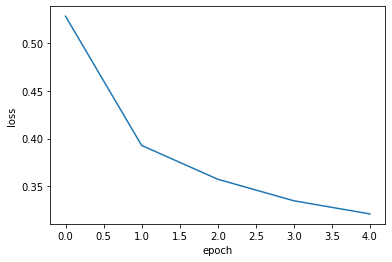

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

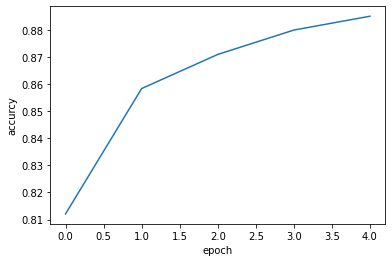

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accurcy')
plt.show()

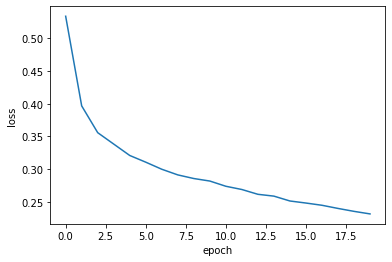

In [8]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy' , metrics='accuracy')
history = model.fit(train_scaled , train_target , epochs=20 , verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

In [9]:
model= model_fn()
model.compile(loss = 'sparse_categorical_crossentropy' , metrics='accuracy')
history = model.fit(train_scaled , train_target , epochs=20 , verbose=0 , validation_data = (val_scaled , val_target))

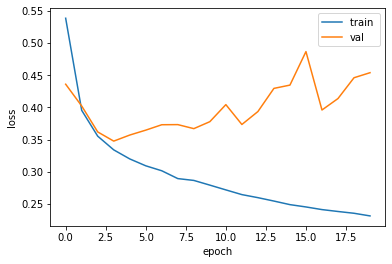

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train ' , 'val'])
plt.show()

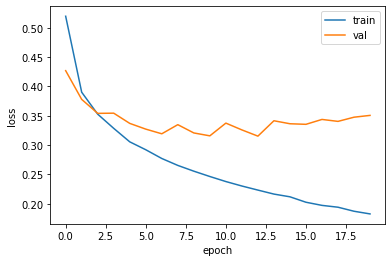

In [11]:
model = model_fn()
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics='accuracy')
history = model.fit(train_scaled , train_target , epochs=20 , verbose = 0 , validation_data = (val_scaled , val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

### 드롭아웃

In [12]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


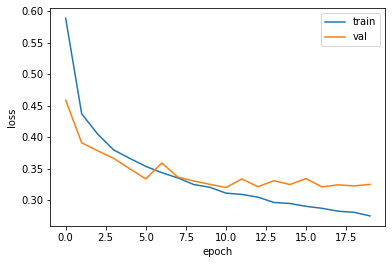

In [13]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics='accuracy')
history = model.fit(train_scaled , train_target , epochs=20 ,verbose=0 , validation_data = (val_scaled , val_target) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

### 모델 저장과 복원

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics='accuracy') 
history = model.fit(train_scaled , train_target , epochs=10 , verbose=0 , validation_data=(val_scaled , val_target))

In [15]:
model.save_weights('model-weights.h5')

In [16]:
model.save('model-whole.h5')

In [17]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Feb 24 12:11 model-weights.h5
-rw-r--r-- 1 root root 982664 Feb 24 12:11 model-whole.h5


In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [19]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled) , axis=-1)
print(np.mean(val_labels ==val_target))

0.8773333333333333


In [20]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8773


[0.3270435333251953, 0.8773333430290222]

### 콜백

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled , train_target , epochs=20 , verbose=0, validation_data = (val_scaled , val_target) , callbacks=[checkpoint_cb])

In [23]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3274 - accuracy: 0.8832


[0.32736894488334656, 0.8832499980926514]

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2 , restore_best_weights=True)
history = model.fit(train_scaled , train_target , epochs=20 , verbose = 0 ,
                    validation_data = (val_scaled , val_target) ,
                    callbacks=[checkpoint_cb , early_stopping_cb])

In [27]:
print(early_stopping_cb.stopped_epoch)

11


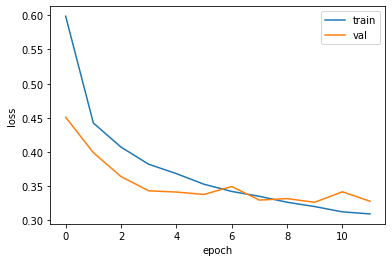

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [29]:
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8823


[0.32650667428970337, 0.8823333382606506]